# libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv(r"D:\rockfall\rockfall_timeseries_flat.csv")

# Features (X) and Target (y)

In [14]:
X = df.drop(["failure_label", "sequence_id"], axis=1)  
y = df["failure_label"]                                


In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# RENDOM FOREST

In [16]:
rf = RandomForestClassifier(
    n_estimators=200,     
    max_depth=None,       
    random_state=42,
    n_jobs=-1
)

In [19]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [21]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6160
           1       1.00      1.00      1.00      3840

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


 Confusion Matrix:
 [[6160    0]
 [   0 3840]]


In [22]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

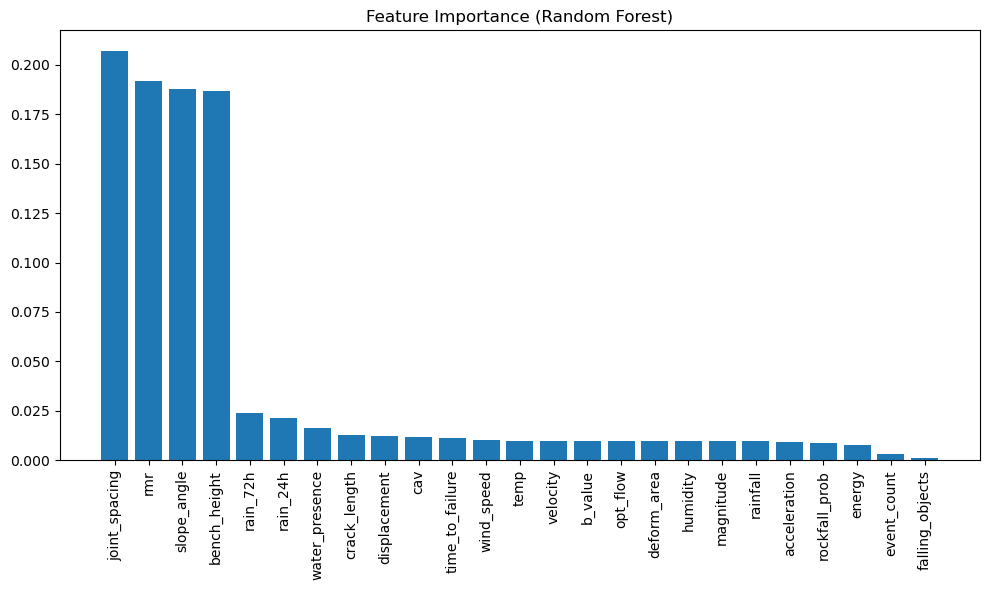

In [23]:

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()